In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid", {"grid.color": ".6"})

First we load the data as is, and we see it is defficiently formatted

In [2]:
df = pd.read_csv('critical_gap.csv')
df

# FILTER OUT WHEN ACCEPTED IS GREATER THAN REJECTED (TAKE OUT REJECTED)
# MAKE THE INTRO
# DESCRIBE THE METHOD

,Vehicle,Gender,Direction,Type,Queue,Waiting time [s],Accepted gap [s],Accepted type,Rejected gap 1 [s],Rejected type 1,...,Rejected gap 10 [s],Rejected type 10,Rejected gap 11 [s],Rejected type 11,Rejected gap 12 [s],Rejected type 12,Rejected gap 13 [s],Rejected type 13,Rejected gap 14 [s],Rejected type 14
0,1,m,r,c,0,4.000,12.814000,Car,0.902004,Car,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,f,r,c,0,3.796,34.023000,Car,2.203998,Car,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,m,r,c,0,8.672,0.049997,Car,6.101996,Car,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,m,r,c,0,0.672,15.053000,Car,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,m,r,c,0,6.250,8.912000,Car,3.773000,Car,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,264,m,r,c,0,1.716,11.282000,Car,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,265,m,r,c,0,1.389,6.821000,Car,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,266,m,r,c,0,3.292,21.141000,Car,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266,267,m,r,c,0,5.257,16.414000,Car,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
columns = [['Vehicle', 'Gender', 'Direction', 'Type', 'Queue', 'Waiting time [s]', 'Rejected gap ' + str(i) + ' [s]', 'Rejected type ' + str(i)] for i in range(1,15)]
columns.append(['Vehicle', 'Gender', 'Direction', 'Type', 'Queue', 'Waiting time [s]', 'Accepted gap [s]', 'Accepted type'])

We reformat the data to follow best practices

In [4]:
dfs = []

for column_set in columns:
    df_subset = df[column_set].dropna()
    df_subset['Accepted'] = False
    column_names = list(df_subset.columns)
    column_names[-3] = 'Gap'
    column_names[-2] = 'Vehicle type'
    df_subset.columns = column_names
    dfs.append(df_subset)

    # Rename the columns to be universal
    
dfs[-1]['Accepted'] = True

clean_df = pd.concat(dfs)
clean_df.sort_values(['Vehicle','Accepted'], inplace=True)
clean_df['Gender'].loc[clean_df['Gender'] == 'M'] = 'm' 
clean_df['Vehicle type'].loc[clean_df['Vehicle type'] == 'van'] = 'Van'
clean_df.reset_index(drop=True, inplace=True)
clean_df.head(10)

D:\Programs\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Vehicle,Gender,Direction,Type,Queue,Waiting time [s],Gap,Vehicle type,Accepted
0,1,m,r,c,0,4.000,0.902004,Car,False
1,1,m,r,c,0,4.000,1.403996,Car,False
2,1,m,r,c,0,4.000,1.357003,Car,False
3,1,m,r,c,0,4.000,12.814000,Car,True
4,2,f,r,c,0,3.796,2.203998,Car,False
5,2,f,r,c,0,3.796,34.023000,Car,True
6,3,m,r,c,0,8.672,6.101996,Car,False
7,3,m,r,c,0,8.672,0.049997,Car,True
8,4,m,r,c,0,0.672,15.053000,Car,True
9,5,m,r,c,0,6.250,3.773000,Car,False


We find some duplicate gap data in the values. It seems that when a car is in a queue, the gaps for the car first in the queue is counted for the cars behind, when in reality those cars behind would not be able to observe such gap.

In [5]:
clean_df[clean_df.duplicated(['Gap'], keep=False)].sort_values('Gap')

,Vehicle,Gender,Direction,Type,Queue,Waiting time [s],Gap,Vehicle type,Accepted
464,174,m,r,c,0,6.958,0.873994,Car,False
461,173,m,r,v,1,6.022,0.873994,Car,False
389,154,f,r,c,1,10.967,0.889001,Car,False
394,155,m,r,c,0,13.806,0.889001,Car,False
553,208,m,r,c,1,19.298,0.967003,MTW,False
...,...,...,...,...,...,...,...,...,...
199,89,m,r,c,0,6.296,10.554000,Car,True
649,235,f,r,c,0,28.626,16.287007,Car,False
644,234,f,r,c,1,39.951,16.287007,Car,False
197,88,m,r,c,0,6.937,25.260000,Car,True


We need to eliminate those observations.

In [6]:
clean_df = clean_df.sort_values('Queue').drop_duplicates('Gap')
clean_df

,Vehicle,Gender,Direction,Type,Queue,Waiting time [s],Gap,Vehicle type,Accepted
0,1,m,r,c,0,4.000,0.902004,Car,False
423,162,m,r,c,0,16.068,1.964999,Car,False
424,162,m,r,c,0,16.068,2.168003,Car,False
425,162,m,r,c,0,16.068,1.170000,Car,False
426,162,m,r,c,0,16.068,5.569000,Car,False
...,...,...,...,...,...,...,...,...,...
714,258,m,r,c,2,22.464,0.721001,Car,False
243,100,f,r,c,2,18.205,11.794000,Car,True
715,258,m,r,c,2,22.464,1.763006,Car,False
623,232,m,r,c,3,34.788,13.970000,Car,True


We see that there are some accepted gaps of less than 1 second, which is not realistic, we will exclude those.

In [7]:
clean_df.loc[clean_df['Accepted']==True].sort_values('Gap').head(20)

,Vehicle,Gender,Direction,Type,Queue,Waiting time [s],Gap,Vehicle type,Accepted
442,168,f,r,c,0,6.099,0.000003,Van,True
358,141,f,r,c,0,6.755,0.014004,MTW,True
530,199,m,r,c,0,6.724,0.017997,Car,True
7,3,m,r,c,0,8.672,0.049997,Car,True
654,237,f,r,c,0,4.103,0.053000,Car,True
580,216,m,r,c,1,13.291,0.095999,Car,True
697,247,m,r,c,0,8.377,0.221000,Car,True
422,161,m,r,v,1,9.672,0.233000,Car,True
584,217,m,r,c,0,12.028,0.314000,Car,True
578,215,f,r,c,1,16.021,0.315000,Car,True


In [8]:
clean_df = clean_df.drop(clean_df[(clean_df['Gap'] < 1.0) & (clean_df['Accepted'] == True)].index)
clean_df

,Vehicle,Gender,Direction,Type,Queue,Waiting time [s],Gap,Vehicle type,Accepted
0,1,m,r,c,0,4.000,0.902004,Car,False
423,162,m,r,c,0,16.068,1.964999,Car,False
424,162,m,r,c,0,16.068,2.168003,Car,False
425,162,m,r,c,0,16.068,1.170000,Car,False
426,162,m,r,c,0,16.068,5.569000,Car,False
...,...,...,...,...,...,...,...,...,...
714,258,m,r,c,2,22.464,0.721001,Car,False
243,100,f,r,c,2,18.205,11.794000,Car,True
715,258,m,r,c,2,22.464,1.763006,Car,False
623,232,m,r,c,3,34.788,13.970000,Car,True


Same happens with some of the rejected ones, they can drive very close but less than 0.1s is unrealistic (less than a meter and a half distance).

In [9]:
clean_df.loc[clean_df['Accepted']==False].sort_values('Gap').head(50)

,Vehicle,Gender,Direction,Type,Queue,Waiting time [s],Gap,Vehicle type,Accepted
727,259,m,r,c,1,32.401,0.003000,Car,False
698,248,f,r,c,0,4.399,0.017001,Car,False
552,208,m,r,c,1,19.298,0.049992,Car,False
258,105,m,r,c,2,20.888,0.057999,Car,False
354,140,f,r,c,0,14.180,0.061006,Car,False
511,188,m,r,c,0,1.060,0.062998,Disturbance,False
350,139,f,r,c,1,12.792,0.091996,Car,False
573,215,f,r,c,1,16.021,0.095999,Car,False
398,156,m,r,c,1,23.540,0.108009,Car,False
652,237,f,r,c,0,4.103,0.114999,Car,False


We need to eliminate those records

In [10]:
clean_df = clean_df.drop(clean_df[(clean_df['Gap'] < 0.1) & (clean_df['Accepted'] == False)].index)
clean_df

,Vehicle,Gender,Direction,Type,Queue,Waiting time [s],Gap,Vehicle type,Accepted
0,1,m,r,c,0,4.000,0.902004,Car,False
423,162,m,r,c,0,16.068,1.964999,Car,False
424,162,m,r,c,0,16.068,2.168003,Car,False
425,162,m,r,c,0,16.068,1.170000,Car,False
426,162,m,r,c,0,16.068,5.569000,Car,False
...,...,...,...,...,...,...,...,...,...
714,258,m,r,c,2,22.464,0.721001,Car,False
243,100,f,r,c,2,18.205,11.794000,Car,True
715,258,m,r,c,2,22.464,1.763006,Car,False
623,232,m,r,c,3,34.788,13.970000,Car,True


Because of these operations, some vehicles now have rejected gaps, but no accepted gaps, we need to drop the data for these vehicles

In [11]:
all_vehicles = set(clean_df['Vehicle'])
accepted_vehicles = set(clean_df[(clean_df['Accepted'])==True]['Vehicle'])
only_rejected = list(all_vehicles.symmetric_difference(accepted_vehicles))
print('Vehicles that only have rejected gaps:')
print(only_rejected)
print('Total: ' + str(len(only_rejected)))
clean_df = clean_df.drop(clean_df.loc[clean_df['Vehicle'].isin(only_rejected)].index)
clean_df.sort_values(['Vehicle','Accepted'], inplace=True)
clean_df

Vehicles that only have rejected gaps:
[3, 30, 87, 141, 149, 161, 168, 199, 200, 211, 215, 216, 217, 237, 247]
Total: 15


,Vehicle,Gender,Direction,Type,Queue,Waiting time [s],Gap,Vehicle type,Accepted
0,1,m,r,c,0,4.000,0.902004,Car,False
1,1,m,r,c,0,4.000,1.403996,Car,False
3,1,m,r,c,0,4.000,12.814000,Car,True
4,2,f,r,c,0,3.796,2.203998,Car,False
5,2,f,r,c,0,3.796,34.023000,Car,True
...,...,...,...,...,...,...,...,...,...
766,268,f,r,c,0,13.900,1.311007,Car,False
763,268,f,r,c,0,13.900,7.663007,Car,False
764,268,f,r,c,0,13.900,2.401999,Car,False
765,268,f,r,c,0,13.900,1.325994,Car,False


In some cases there are also vehicles for which a rejected gap is bigger than the accepted gap, which seems counterintuitive. We attribute this to some disturbance, for example, the gap pertaining to 2 vehicles that passed when the minor stream vehicle was still not in position to merge (here the lag instead of the gap would be relevant).

In [12]:
dfs = []
# print(clean_df['Vehicle'].unique())
for vehicle in clean_df['Vehicle'].unique():
    df = clean_df[clean_df['Vehicle'] == vehicle]
    accepted = list(df[df['Accepted'] == True]['Gap'])[0]
#     print(df)
#     print(accepted)
    df = df[df['Gap'] <= accepted]
#     print (df)
    dfs.append(df)

clean_df = pd.concat(dfs)
clean_df.sort_values(['Vehicle','Accepted'], inplace=True)
clean_df.reset_index(drop=True, inplace=True)
clean_df

,Vehicle,Gender,Direction,Type,Queue,Waiting time [s],Gap,Vehicle type,Accepted
0,1,m,r,c,0,4.000,0.902004,Car,False
1,1,m,r,c,0,4.000,1.403996,Car,False
2,1,m,r,c,0,4.000,12.814000,Car,True
3,2,f,r,c,0,3.796,2.203998,Car,False
4,2,f,r,c,0,3.796,34.023000,Car,True
...,...,...,...,...,...,...,...,...,...
572,267,m,r,c,0,5.257,16.414000,Car,True
573,268,f,r,c,0,13.900,1.311007,Car,False
574,268,f,r,c,0,13.900,2.401999,Car,False
575,268,f,r,c,0,13.900,1.325994,Car,False


There are some vehicles that do not have observations for rejected gaps, only for accepted gaps.

In [13]:
all_vehicles = set(clean_df['Vehicle'])
rejected_vehicles = set(clean_df[(clean_df['Accepted'])==False]['Vehicle'])
only_accepted = list(all_vehicles.symmetric_difference(rejected_vehicles))
print(only_accepted)
print('Total: ' + str(len(only_accepted)))

[4, 6, 7, 9, 12, 13, 15, 20, 23, 24, 26, 28, 29, 32, 33, 34, 36, 43, 47, 49, 52, 55, 56, 58, 59, 67, 72, 76, 78, 79, 80, 82, 83, 86, 89, 92, 94, 98, 104, 107, 113, 115, 118, 119, 121, 122, 123, 124, 126, 129, 137, 138, 146, 148, 151, 158, 160, 165, 166, 167, 171, 182, 187, 189, 190, 191, 192, 195, 197, 198, 202, 205, 210, 212, 218, 222, 223, 225, 226, 230, 231, 236, 245, 250, 253, 254, 256, 257, 262, 263, 264, 265, 266, 267]
Total: 94


We need to add a rejected gap of 0 seconds to those vehicles

In [14]:
main_df = clean_df[['Vehicle','Gender', 'Direction', 'Type', 'Queue', 'Waiting time [s]']].drop_duplicates() # Dataframe of vehicle infor on the main road
add_rejected_df = main_df[main_df['Vehicle'].isin(only_accepted)].sort_values('Vehicle')
add_rejected_df
add_rejected_df['Gap'] = 0
add_rejected_df['Vehicle type'] = 'Artificial'
add_rejected_df['Accepted'] = False
clean_df = pd.concat([clean_df, add_rejected_df]).sort_values(['Vehicle', 'Accepted']).reset_index(drop=True)
clean_df

,Vehicle,Gender,Direction,Type,Queue,Waiting time [s],Gap,Vehicle type,Accepted
0,1,m,r,c,0,4.000,0.902004,Car,False
1,1,m,r,c,0,4.000,1.403996,Car,False
2,1,m,r,c,0,4.000,12.814000,Car,True
3,2,f,r,c,0,3.796,2.203998,Car,False
4,2,f,r,c,0,3.796,34.023000,Car,True
...,...,...,...,...,...,...,...,...,...
666,267,m,r,c,0,5.257,16.414000,Car,True
667,268,f,r,c,0,13.900,1.311007,Car,False
668,268,f,r,c,0,13.900,2.401999,Car,False
669,268,f,r,c,0,13.900,1.325994,Car,False


In [15]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Vehicle           671 non-null    int64  
 1   Gender            671 non-null    object 
 2   Direction         671 non-null    object 
 3   Type              671 non-null    object 
 4   Queue             671 non-null    int64  
 5   Waiting time [s]  671 non-null    float64
 6   Gap               671 non-null    float64
 7   Vehicle type      671 non-null    object 
 8   Accepted          671 non-null    bool   
dtypes: bool(1), float64(2), int64(2), object(4)
memory usage: 42.7+ KB


## Ocurrences of vehicle types on main road

In [16]:
clean_df['Vehicle type'].value_counts()

Car            496
Artificial      94
Van             50
MTW              9
Bus              9
HGV              7
Disturbance      6
Name: Vehicle type, dtype: int64

## Ocurrences of vehicle types on secondary road

In [17]:
main_df['Type'].value_counts()

# Motorized two-wheeler
# Take out counts that are too low

c    235
v     11
m      4
Name: Type, dtype: int64

In [18]:
# Only vehicle type c is significant

clean_df = clean_df[clean_df['Type'] == 'c']
clean_df['Type'].value_counts()

c    624
Name: Type, dtype: int64

## Total gender counts of drivers

In [19]:
main_df = main_df[main_df['Type'] == 'c']
main_df['Gender'].value_counts()

m    171
f     64
Name: Gender, dtype: int64

## Main statistics for the vehicles on secondary road

In [20]:
vehicle_stats = clean_df.describe().drop('Vehicle', axis=1).round(3).drop('Gap', axis=1)
vehicle_stats

,Queue,Waiting time [s]
count,624.000,624.000
mean,0.245,10.256
std,0.525,8.949
min,0.000,0.312
25%,0.000,3.074
50%,0.000,7.301
75%,0.000,14.945
max,3.000,39.951


## Statistics accepted gaps

In [21]:
clean_df[clean_df['Accepted']==True].describe().drop({'Vehicle', 'Waiting time [s]', 'Queue'}, axis=1)

,Gap
count,235.000000
mean,14.218800
std,8.782732
min,3.354000
25%,7.975000
50%,11.949000
75%,18.630000
max,66.409000


## Statistics rejected gaps

In [22]:
clean_df[clean_df['Accepted']==False].describe().drop({'Vehicle', 'Waiting time [s]', 'Queue'}, axis=1)

,Gap
count,389.000000
mean,2.082856
std,2.066421
min,0.000000
25%,0.280005
50%,1.747999
75%,2.764003
max,12.261993


## Histograms accepted and rejected gaps

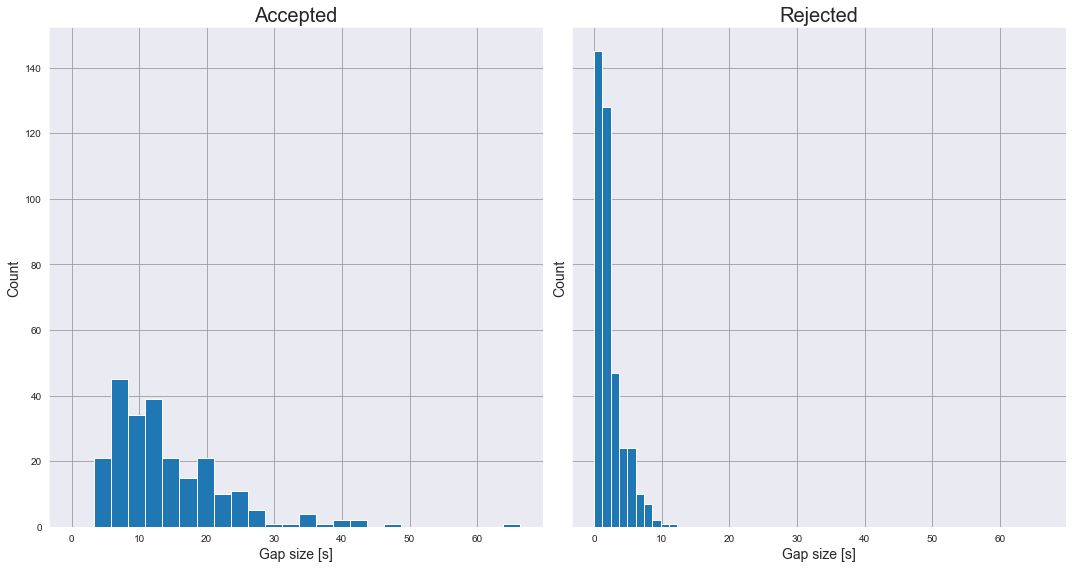

In [23]:
# Select the datasets
rejected = clean_df[clean_df['Accepted']==False]['Gap']
accepted = clean_df[clean_df['Accepted']==True]['Gap']

fig, axs = plt.subplots(1, 2, figsize=(15,8), sharex=True, sharey=True, tight_layout=True)

# We can set the number of bins with the *bins* keyword argument.
axs[0].hist(accepted, bins=25)
axs[0].set_title('Accepted', fontsize=20)
axs[0].set_xlabel('Gap size [s]', fontsize=14)
axs[0].set_ylabel('Count', fontsize=14)

axs[1].hist(rejected, bins=10)
axs[1].set_xlabel('Gap size [s]', fontsize=14)
axs[1].set_ylabel('Count', fontsize=14)
axs[1].set_title('Rejected', fontsize=20)

plt.show()

fig.savefig('vis/Histograms_total.png')

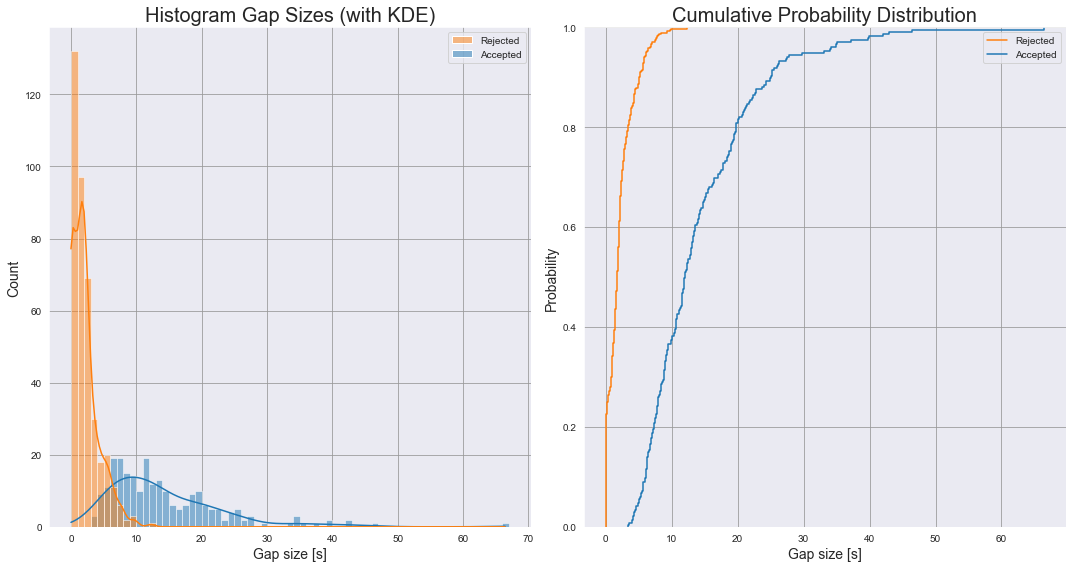

In [24]:
data_df = clean_df[['Gap', 'Accepted']].reset_index(drop=True)

fig, axs = plt.subplots(1, 2, figsize=(15,8), tight_layout=True)

sns.histplot(ax=axs[0], data=data_df, x='Gap', hue='Accepted', kde=True, binwidth=1, palette=["C1", "C0"])
axs[0].set_title('Histogram Gap Sizes (with KDE)', fontsize=20)
axs[0].set_xlabel('Gap size [s]', fontsize=14)
axs[0].set_ylabel('Count', fontsize=14)
legend = axs[0].get_legend()
legend.set_title('')
legend.texts[0].set_text('Rejected')
legend.texts[1].set_text('Accepted')


sns.ecdfplot(data=data_df, x='Gap', hue='Accepted', palette=["C1", "C0"])
axs[1].set_title('Cumulative Probability Distribution', fontsize=20)
axs[1].set_xlabel('Gap size [s]', fontsize=14)
axs[1].set_ylabel('Probability', fontsize=14)
legend = axs[1].get_legend()
legend.set_title('')
legend.texts[0].set_text('Rejected')
legend.texts[1].set_text('Accepted')

fig.savefig('vis/Nicer_histograms_total.png')

In [25]:
male_accepted_df = clean_df[(clean_df['Accepted']==True) & (clean_df['Gender']=='m')]
male_accepted_df

,Vehicle,Gender,Direction,Type,Queue,Waiting time [s],Gap,Vehicle type,Accepted
2,1,m,r,c,0,4.000,12.814,Car,True
6,4,m,r,c,0,0.672,15.053,Car,True
9,5,m,r,c,0,6.250,8.912,Car,True
11,6,m,r,c,0,1.187,42.029,Car,True
13,7,m,r,c,0,1.781,4.076,Car,True
...,...,...,...,...,...,...,...,...,...
658,263,m,r,c,0,2.527,9.971,Car,True
660,264,m,r,c,0,1.716,11.282,Car,True
662,265,m,r,c,0,1.389,6.821,Car,True
664,266,m,r,c,0,3.292,21.141,Car,True


In [26]:
male_rejected_df = clean_df[(clean_df['Accepted']==False) & (clean_df['Gender']=='m')]
male_rejected_df

,Vehicle,Gender,Direction,Type,Queue,Waiting time [s],Gap,Vehicle type,Accepted
0,1,m,r,c,0,4.000,0.902004,Car,False
1,1,m,r,c,0,4.000,1.403996,Car,False
5,4,m,r,c,0,0.672,0.000000,Artificial,False
7,5,m,r,c,0,6.250,3.773000,Car,False
8,5,m,r,c,0,6.250,1.872008,Car,False
...,...,...,...,...,...,...,...,...,...
657,263,m,r,c,0,2.527,0.000000,Artificial,False
659,264,m,r,c,0,1.716,0.000000,Artificial,False
661,265,m,r,c,0,1.389,0.000000,Artificial,False
663,266,m,r,c,0,3.292,0.000000,Artificial,False


In [27]:
female_accepted_df = clean_df[(clean_df['Accepted']==True) & (clean_df['Gender']=='f')]
female_accepted_df

,Vehicle,Gender,Direction,Type,Queue,Waiting time [s],Gap,Vehicle type,Accepted
4,2,f,r,c,0,3.796,34.023,Car,True
23,12,f,r,c,1,4.797,46.466,Car,True
29,16,f,r,c,0,3.125,8.407,Car,True
36,19,f,r,c,0,4.157,14.068,Car,True
64,31,f,r,c,0,7.672,18.474,Car,True
...,...,...,...,...,...,...,...,...,...
609,244,f,r,c,0,3.432,12.249,Car,True
616,248,f,r,c,0,4.399,8.348,Car,True
624,253,f,r,c,0,4.041,4.230,Car,True
650,260,f,r,c,0,32.245,8.287,Car,True


In [28]:
female_rejected_df = clean_df[(clean_df['Accepted']==False) & (clean_df['Gender']=='f')]
female_rejected_df

,Vehicle,Gender,Direction,Type,Queue,Waiting time [s],Gap,Vehicle type,Accepted
3,2,f,r,c,0,3.796,2.203998,Car,False
22,12,f,r,c,1,4.797,0.000000,Artificial,False
28,16,f,r,c,0,3.125,2.578006,Car,False
34,19,f,r,c,0,4.157,1.157997,Car,False
35,19,f,r,c,0,4.157,2.278000,Car,False
...,...,...,...,...,...,...,...,...,...
648,260,f,r,c,0,32.245,1.434995,Car,False
649,260,f,r,c,0,32.245,1.669001,Car,False
667,268,f,r,c,0,13.900,1.311007,Car,False
668,268,f,r,c,0,13.900,2.401999,Car,False


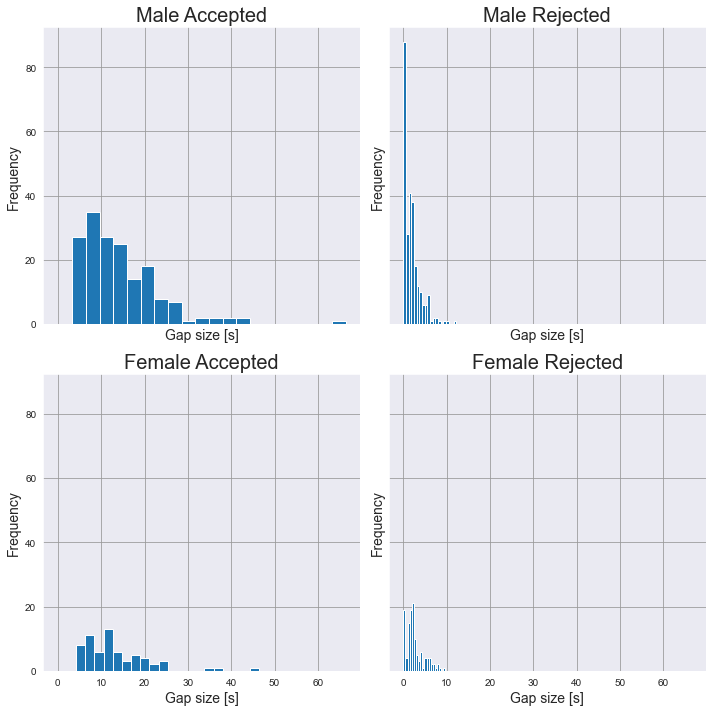

In [29]:
n_bins = 20

# Select the datasets
rejected_male = male_rejected_df[male_rejected_df['Accepted']==False]['Gap']
accepted_male = male_accepted_df[male_accepted_df['Accepted']==True]['Gap']

rejected_female = female_rejected_df[female_rejected_df['Accepted']==False]['Gap']
accepted_female = female_accepted_df[female_accepted_df['Accepted']==True]['Gap']

fig, axs = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True, tight_layout=True)

# We can set the number of bins with the *bins* keyword argument.

axs[0][0].hist(accepted_male, bins=n_bins)
axs[0][0].set_title('Male Accepted', fontsize=20)
axs[0][0].set_xlabel('Gap size [s]', fontsize=14)
axs[0][0].set_ylabel('Frequency', fontsize=14)

axs[0][1].hist(rejected_male, bins=n_bins)
axs[0][1].set_xlabel('Gap size [s]', fontsize=14)
axs[0][1].set_ylabel('Frequency', fontsize=14)
axs[0][1].set_title('Male Rejected', fontsize=20)

axs[1][0].hist(accepted_female, bins=n_bins)
axs[1][0].set_title('Female Accepted', fontsize=20)
axs[1][0].set_xlabel('Gap size [s]', fontsize=14)
axs[1][0].set_ylabel('Frequency', fontsize=14)

axs[1][1].hist(rejected_female, bins=n_bins)
axs[1][1].set_xlabel('Gap size [s]', fontsize=14)
axs[1][1].set_ylabel('Frequency', fontsize=14)
axs[1][1].set_title('Female Rejected', fontsize=20)

plt.show()

fig.savefig('vis/Histograms_per_gender.png')

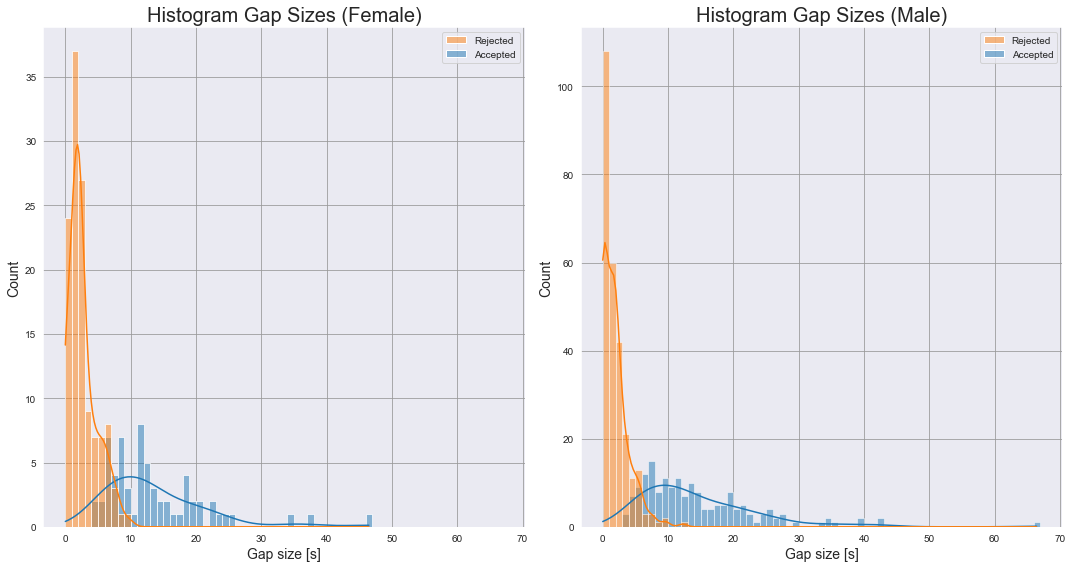

In [30]:
female_df = clean_df[clean_df['Gender']=='f'].reset_index(drop=True)
male_df = clean_df[clean_df['Gender']=='m'].reset_index(drop=True)

fig, axs = plt.subplots(1, 2, figsize=(15,8), sharex=True, tight_layout=True)

sns.histplot(ax=axs[0], data=female_df, x='Gap', hue='Accepted', kde=True, binwidth=1, palette=["C1", "C0"])
axs[0].set_title('Histogram Gap Sizes (Female)', fontsize=20)
axs[0].set_xlabel('Gap size [s]', fontsize=14)
axs[0].set_ylabel('Count', fontsize=14)
legend = axs[0].get_legend()
legend.set_title('')
legend.texts[0].set_text('Rejected')
legend.texts[1].set_text('Accepted')

sns.histplot(ax=axs[1], data=male_df, x='Gap', hue='Accepted', kde=True, binwidth=1, palette=["C1", "C0"])
axs[1].set_title('Histogram Gap Sizes (Male)', fontsize=20)
axs[1].set_xlabel('Gap size [s]', fontsize=14)
axs[1].set_ylabel('Count', fontsize=14)
legend = axs[1].get_legend()
legend.set_title('')
legend.texts[0].set_text('Rejected')
legend.texts[1].set_text('Accepted')

fig.savefig('vis/Nicer_histograms_per_gender.png')

Boxplots for accepted and rejected gaps

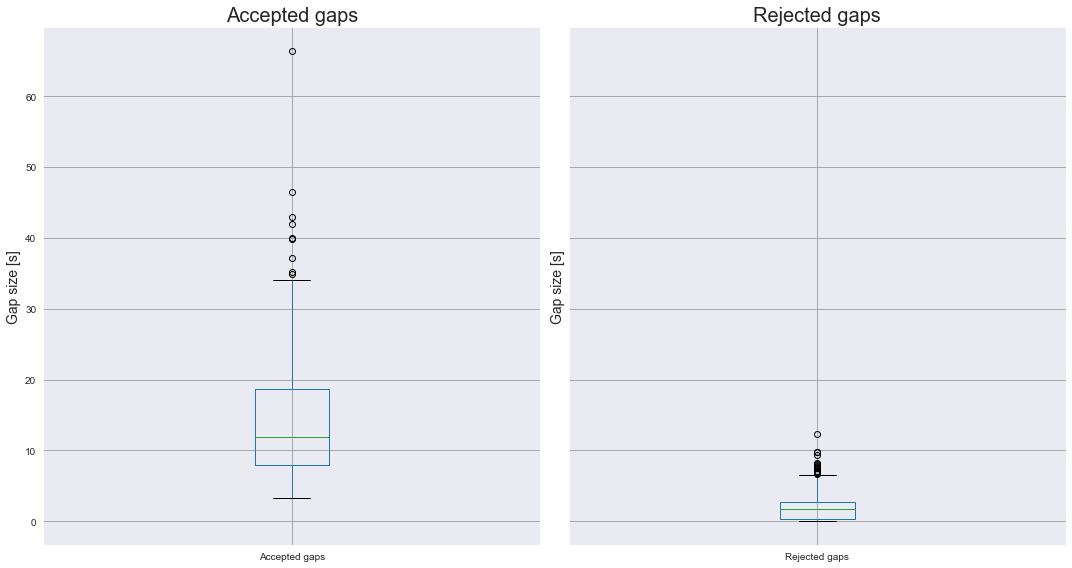

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(15,8), sharey=True, tight_layout=True)

rejected1 = rejected.to_frame()
rejected2 = rejected1.rename(columns={'Gap':'Rejected gaps'})
accepted1 = accepted.to_frame()
accepted2 = accepted1.rename(columns={'Gap':'Accepted gaps'})

#plt.figure();
box_am = accepted2.boxplot(column = 'Accepted gaps', ax=axs[0])
box_am.set_title('Accepted gaps', fontsize=20)
box_am.set_ylabel('Gap size [s]', fontsize=14)
#box_am.set_xlabel('Subgroup', fontsize=14)

#plt.figure();
box_rm = rejected2.boxplot(column = 'Rejected gaps', ax=axs[1])
box_rm.set_ylabel('Gap size [s]', fontsize=14)
#box_rm.set_xlabel('Subgroup', fontsize=14)
box_rm.set_title('Rejected gaps', fontsize=20)

fig.savefig('vis/Boxplot_general.png')

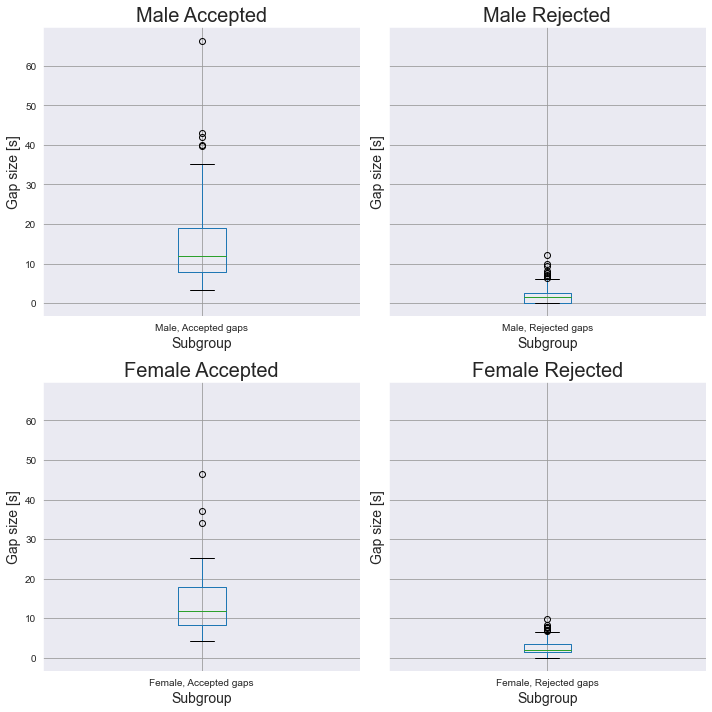

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [32]:
fig, axs = plt.subplots(2, 2, figsize=(10,10), sharey=True, tight_layout=True)

rejected_male1 = rejected_male.to_frame()
rejected_male2 = rejected_male1.rename(columns={'Gap':'Male, Rejected gaps'})
accepted_male1 = accepted_male.to_frame()
accepted_male2 = accepted_male1.rename(columns={'Gap':'Male, Accepted gaps'})
rejected_female1 = rejected_female.to_frame()
rejected_female2 = rejected_female1.rename(columns={'Gap':'Female, Rejected gaps'})
accepted_female1 = accepted_female.to_frame()
accepted_female2 = accepted_female1.rename(columns={'Gap':'Female, Accepted gaps'})

#plt.figure();
box_am = accepted_male2.boxplot(column = 'Male, Accepted gaps', ax=axs[0][0])
box_am.set_title('Male Accepted', fontsize=20)
box_am.set_ylabel('Gap size [s]', fontsize=14)
box_am.set_xlabel('Subgroup', fontsize=14)

plt.figure();
box_rm = rejected_male2.boxplot(column = 'Male, Rejected gaps', ax=axs[0][1])
box_rm.set_ylabel('Gap size [s]', fontsize=14)
box_rm.set_xlabel('Subgroup', fontsize=14)
box_rm.set_title('Male Rejected', fontsize=20)

plt.figure();
box_af = accepted_female2.boxplot(column = 'Female, Accepted gaps', ax=axs[1][0])
box_af.set_title('Female Accepted', fontsize=20)
box_af.set_ylabel('Gap size [s]', fontsize=14)
box_af.set_xlabel('Subgroup', fontsize=14)

plt.figure();
box_rf = rejected_female2.boxplot(column = 'Female, Rejected gaps', ax=axs[1][1])
box_rf.set_ylabel('Gap size [s]', fontsize=14)
box_rf.set_xlabel('Subgroup', fontsize=14)
box_rf.set_title('Female Rejected', fontsize=20)

fig.savefig('vis/Boxplot_per_gender.png')

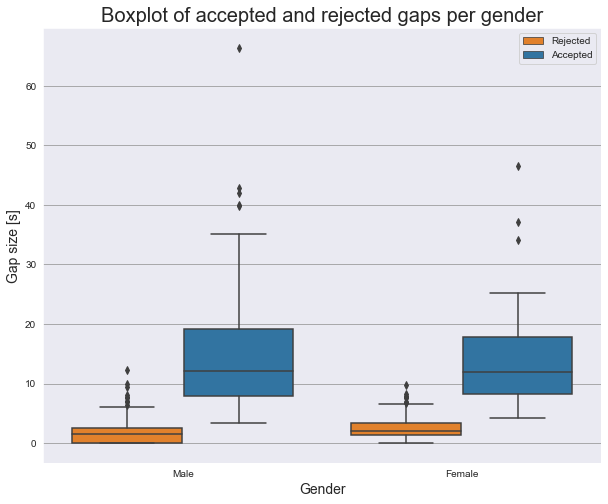

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(10,8))

sns.boxplot(x="Gender", y="Gap", hue="Accepted", data=clean_df, palette=["C1", "C0"], ax=ax)
ax.set_title('Boxplot of accepted and rejected gaps per gender', fontsize=20)
ax.set_xlabel('Gender', fontsize=14)
ax.set_ylabel('Gap size [s]', fontsize=14)
ax.set_xticklabels(['Male', 'Female'])
legend = ax.get_legend()
legend.set_title('')
legend.texts[0].set_text('Rejected')
legend.texts[1].set_text('Accepted')

fig.savefig('vis/Boxplot_condensed.png')

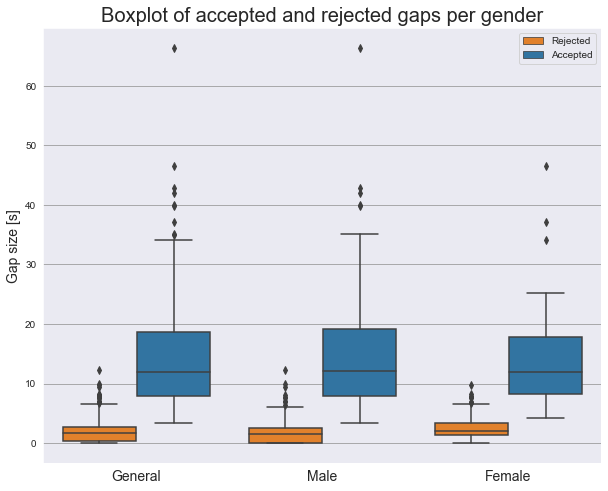

In [34]:
all_data_df = clean_df.copy()
all_data_df['Gender'] = 'x'

frames = [all_data_df, clean_df]

all_data_df = all_data_df.append(clean_df, ignore_index=True)

fig, ax = plt.subplots(1, 1, figsize=(10,8))

sns.boxplot(x="Gender", y="Gap", hue="Accepted", data=all_data_df, palette=["C1", "C0"], ax=ax)
ax.set_title('Boxplot of accepted and rejected gaps per gender', fontsize=20)
#ax.set_xlabel('Gender', fontsize=14)
ax.set_xlabel('')
ax.set_ylabel('Gap size [s]', fontsize=14)
ax.set_xticklabels(['General', 'Male', 'Female'], fontsize=14)
legend = ax.get_legend()
legend.set_title('')
legend.texts[0].set_text('Rejected')
legend.texts[1].set_text('Accepted')

fig.savefig('vis/Boxplot_super_condensed.png')

In [35]:
total_rejected_stats = clean_df[(clean_df['Accepted']==False)].describe().drop({'Vehicle', 'Waiting time [s]', 'Queue'}, axis=1)
total_accepted_stats = clean_df[(clean_df['Accepted']==True)].describe().drop({'Vehicle', 'Waiting time [s]', 'Queue'}, axis=1)
male_rejected_stats = clean_df[(clean_df['Accepted']==False) & (clean_df['Gender']=='m')].describe().drop({'Vehicle', 'Waiting time [s]', 'Queue'}, axis=1)
male_accepted_stats = clean_df[(clean_df['Accepted']==True) & (clean_df['Gender']=='m')].describe().drop({'Vehicle', 'Waiting time [s]', 'Queue'}, axis=1)
female_rejected_stats = clean_df[(clean_df['Accepted']==False) & (clean_df['Gender']=='f')].describe().drop({'Vehicle', 'Waiting time [s]', 'Queue'}, axis=1)
female_accepted_stats = clean_df[(clean_df['Accepted']==True) & (clean_df['Gender']=='f')].describe().drop({'Vehicle', 'Waiting time [s]', 'Queue'}, axis=1)

total_stats = pd.DataFrame()
total_stats['Total Rejected'] = total_rejected_stats['Gap']
total_stats['Total Accepted'] = total_accepted_stats['Gap']
total_stats['Male Rejected'] = male_rejected_stats['Gap']
total_stats['Male Accepted'] = male_accepted_stats['Gap']
total_stats['Female Rejected'] = female_rejected_stats['Gap']
total_stats['Female Accepted'] = female_accepted_stats['Gap']
total_stats = total_stats.round(3)
total_stats

,Total Rejected,Total Accepted,Male Rejected,Male Accepted,Female Rejected,Female Accepted
count,389.000,235.000,265.000,171.000,124.000,64.000
mean,2.083,14.219,1.851,14.444,2.579,13.618
std,2.066,8.783,2.004,9.093,2.119,7.930
min,0.000,3.354,0.000,3.354,0.000,4.230
25%,0.280,7.975,0.000,7.946,1.322,8.234
50%,1.748,11.949,1.510,12.022,2.032,11.898
75%,2.764,18.630,2.543,19.094,3.400,17.884
max,12.262,66.409,12.262,66.409,9.730,46.466


In [36]:
# Save this dataset
clean_df.to_csv('clean_data.csv', index=False)
clean_df.to_csv('clean_data_euro.csv', sep=';', decimal=',', index=False)

In [37]:
# We will also need to get max rejected gap per driver
max_rejected_df = clean_df[clean_df['Accepted'] == False].groupby(['Vehicle']).max()
max_rejected_df.to_csv('max_rejected.csv')
max_rejected_df.to_csv('max_rejected_euro.csv', sep=';', decimal=',')

In [38]:
# Save the stats as well

vehicle_stats.to_csv('vehicle_stats.csv')
vehicle_stats.to_csv('vehicle_stats_euro.csv', sep=';', decimal=',')
total_stats.to_csv('gap_stats.csv')
total_stats.to_csv('gap_stats_euro.csv', sep=';', decimal=',')